# 13장. 선형 회귀

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/machine-learning-with-python-cookbook/blob/master/13.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/machine-learning-with-python-cookbook/blob/master/13.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 13.1 직선 학습하기

In [302]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 데이터를 로드하고 두 개의 특성만 선택합니다.
features = data[:,0:2]
target = target

# # 선형 회귀 모델을 만듭니다.
regression = LinearRegression()

# # 선형 회귀 모델을 훈련합니다.
model = regression.fit(features, target)

 features 설명  
 
 [00]  CRIM	자치시(town) 별 1인당 범죄율  
 [01]  ZN	25,000 평방피트를 초과하는 거주지역의 비율  
 [02]  INDUS	비소매상업지역이 점유하고 있는 토지의 비율  
 [03]  CHAS	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
 [04]  NOX	10ppm 당 농축 일산화질소  
 [05]  RM	주택 1가구당 평균 방의 개수  
 [06]  AGE	1940년 이전에 건축된 소유주택의 비율  
 [07]  DIS	5개의 보스턴 직업센터까지의 접근성 지수  
 [08]  RAD	방사형 도로까지의 접근성 지수  
 [09]  TAX	10,000 달러 당 재산세율  
 [10]  PTRATIO	자치시(town)별 학생/교사 비율  
 [11]  B	1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
 [12]  LSTAT	모집단의 하위계층의 비율(%)  
 [13]  MEDV	본인 소유의 주택가격(중앙값) (단위: $1,000)  

선형회귀는 특성과 타깃벡터 사이의 관계가 거의 선형이라고 가정합니다. 
즉, 타깃 벡터에 대한 특성의 효과는 상수입니다.
이 선형모델을 식으로 표현하면 다음과 같습니다.

$$ \hat{y} =  \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + \epsilon $$

In [20]:
# 편향을 확인합니다.
model.intercept_

22.485628113468223

In [21]:
# 특성의 계수를 확인합니다.
model.coef_

array([-0.35207832,  0.11610909])

In [22]:
# 첫 번째 계수에 1000을 곱합니다.
model.coef_[0]*1000

-352.07831564026776

In [23]:
# 두 번째 계수에 1000을 곱합니다.
model.coef_[1]*1000

116.10909184400937

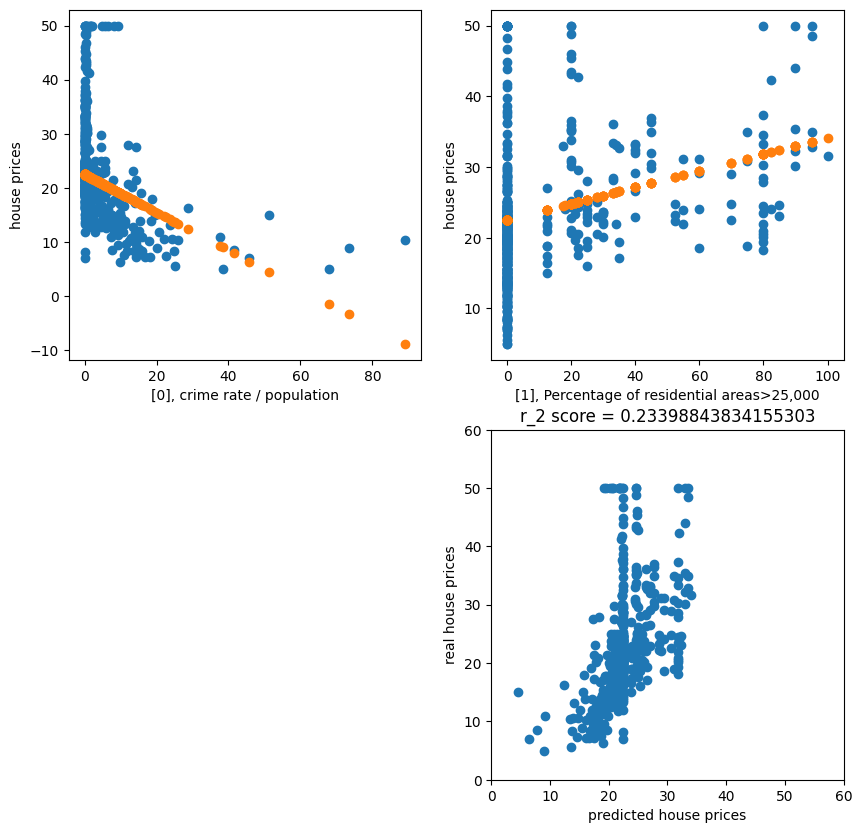

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
# 첫 번째 feature에 대한 그래프
y1 = model.coef_[0] * features[:,0] + model.intercept_

plt.scatter(features[:,0],target)
plt.scatter(features[:,0],y1)
plt.xlabel('[0], crime rate / population')
plt.ylabel('house prices')

plt.subplot(2, 2, 2)
# 두 번째 feature에 대한 그래프
y2 = model.coef_[1] * features[:,1] + model.intercept_

plt.scatter(features[:,1],target)
plt.scatter(features[:,1],y2)
plt.xlabel('[1], Percentage of residential areas>25,000')
plt.ylabel('house prices')

plt.subplot(2, 2, 4)
# r_2 score
y_pred = model.predict(features)
y_pred = (model.coef_ * features).sum(axis=1) + model.intercept_

plt.scatter(y_pred, target)
plt.xlabel('predicted house prices')
plt.ylabel('real house prices')
plt.xlim([0,60])
plt.ylim([0,60])
plt.title('r_2 score = ' + str(r2_score(target, y_pred)))

plt.show()

## 13.2 교차 특성 다루기

In [303]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 데이터를 로드하고 두 개의 특성만 선택합니다.
features = data[:,0:2]
target = target

# 교차 항을 만듭니다.
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)

# 선형 회귀 모델을 만듭니다.
regression = LinearRegression()

# 선형 회귀 모델을 훈련합니다.
model = regression.fit(features_interaction, target)

$$ \hat{y} =  \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + \hat{\beta_{3}}x_{1}x_{2} + \epsilon $$

In [304]:
# 첫 번째 샘플의 특성 값을 확인합니다.
features[0]

array([6.32e-03, 1.80e+01])

In [305]:
# 라이브러리를 임포트합니다.
import numpy as np

# 각 샘플에서 첫 번째와 두 번째 특성을 곱합니다.
interaction_term = np.multiply(features[:, 0], features[:, 1])

In [306]:
# 첫 번째 샘플의 교차 항을 확인합니다.
interaction_term[0]

0.11376

In [178]:
# 첫 번째 샘플의 값을 확인합니다.
features_interaction[0]

array([6.3200e-03, 1.8000e+01, 1.1376e-01])

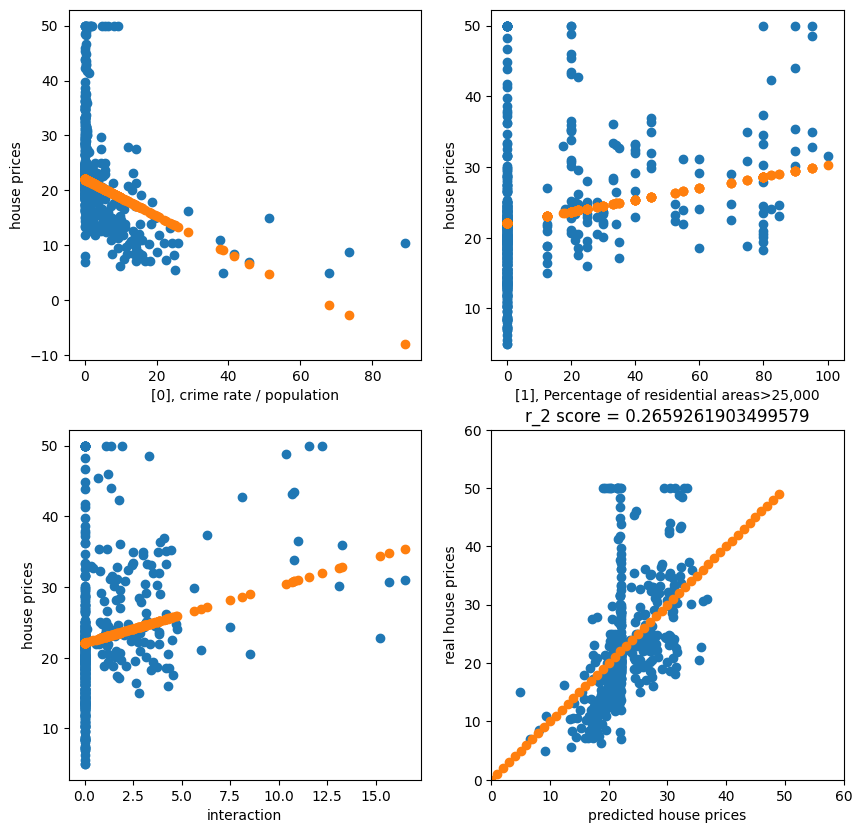

In [307]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
# 첫 번째 feature에 대한 그래프
y1 = model.coef_[0] * features_interaction[:,0] + model.intercept_

plt.scatter(features_interaction[:,0],target)
plt.scatter(features_interaction[:,0],y1)
plt.xlabel('[0], crime rate / population')
plt.ylabel('house prices')

plt.subplot(2, 2, 2)
# 두 번째 feature에 대한 그래프
y2 = model.coef_[1] * features_interaction[:,1] + model.intercept_

plt.scatter(features_interaction[:,1],target)
plt.scatter(features_interaction[:,1],y2)
plt.xlabel('[1], Percentage of residential areas>25,000')
plt.ylabel('house prices')

plt.subplot(2, 2, 3)
# 세 번째 feature에 대한 그래프
y3 = model.coef_[2] * features_interaction[:,2] + model.intercept_

plt.scatter(features_interaction[:,2],target)
plt.scatter(features_interaction[:,2],y3)
plt.xlabel('interaction')
plt.ylabel('house prices')

plt.subplot(2, 2, 4)
# r_2 score
y_pred = model.predict(features_interaction)
y_pred = (model.coef_ * features_interaction).sum(axis=1) + model.intercept_

plt.scatter(y_pred, target)
plt.xlabel('predicted house prices')
plt.ylabel('real house prices')
plt.xlim([0,60])
plt.ylim([0,60])
plt.title('r_2 score = ' + str(r2_score(target, y_pred)))

t = np.array([i for i in range(0,50)])
plt.scatter(t, t)

plt.show()

## 13.3 비선형 관계를 학습하기

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

$$ \hat{y} =  \hat{\beta_{0}} + \hat{\beta_{1}}x^{2}_{1} + ... + \hat{\beta_{d}}x^{2}_{d} + \epsilon $$

In [308]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [309]:
poly = PolynomialFeatures(2,interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [310]:
poly = PolynomialFeatures(2,interaction_only=False)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [289]:
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [311]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터를 로드하고 하나의 특성을 선택합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

features = data[:,0:2]
target = target

# 다항 특성 x^2와 x^3를 만듭니다.
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)

# 선형 회귀 모델을 만듭니다.
regression = LinearRegression()

# 선형 회귀 모델을 훈련합니다.
model = regression.fit(features_polynomial, target)

In [312]:
features.shape

(506, 2)

In [313]:
features_polynomial.shape

(506, 9)

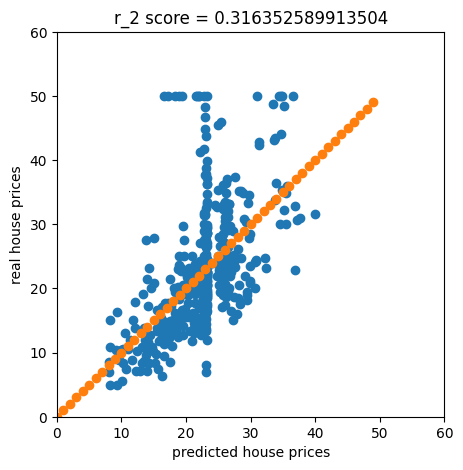

In [314]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

features = features_polynomial

plt.figure(figsize=(5,5))

# r_2 score
y_pred = model.predict(features)
# y_pred = (model.coef_ * features).sum(axis=1) + model.intercept_

plt.scatter(y_pred, target)
plt.xlabel('predicted house prices')
plt.ylabel('real house prices')
plt.xlim([0,60])
plt.ylim([0,60])
plt.title('r_2 score = ' + str(r2_score(target, y_pred)))
t = np.array([i for i in range(0,50)])
plt.scatter(t, t)

plt.show()

## 13.4 규제로 분산을 줄이기

https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0  
https://sanghyu.tistory.com/13

$\alpha$ 값이 클수록 더 간단한 모델을 만든다.

In [207]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 데이터를 로드합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

features = data
target = target

# 특성을 표준화합니다.
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# alpha 값을 지정한 릿지 회귀를 만듭니다.
regression = Ridge(alpha=0.5)

# 선형 회귀 모델을 훈련합니다.
model = regression.fit(features_standardized, target)

In [208]:
# 계수를 확인합니다.
c0 = model.coef_
c0

array([-0.92396151,  1.07393055,  0.12895159,  0.68346136, -2.0427575 ,
        2.67854971,  0.01627328, -3.09063352,  2.62636926, -2.04312573,
       -2.05646414,  0.8490591 , -3.73711409])

사이킷런의 RidgeCV 클래스를 사용하면 좋은 $\alpha$ 값을 선택할 수 있습니다.

In [209]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import RidgeCV

# 세 개의 alpha 값에 대한 릿지 회귀를 만듭니다.
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0]) # type: ignore

# 선형 회귀 모델을 훈련합니다.
model_cv = regr_cv.fit(features_standardized, target)

# 계수를 확인합니다.
c1 = model_cv.coef_
c1

array([-0.91987132,  1.06646104,  0.11738487,  0.68512693, -2.02901013,
        2.68275376,  0.01315848, -3.07733968,  2.59153764, -2.0105579 ,
       -2.05238455,  0.84884839, -3.73066646])

In [210]:
# alpha 값을 확인합니다.
model_cv.alpha_

1.0

### 옮긴이 붙임

In [211]:
# 5-폴드 교차검증을 사용하여 릿지 회귀를 만듭니다.
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5) # type: ignore

# 선형 회귀 모델을 훈련합니다.
model_cv = regr_cv.fit(features_standardized, target)

# alpha 값을 확인합니다.
model_cv.alpha_

10.0

In [212]:
c2 = model_cv.coef_
c2

array([-0.85905074,  0.95497477, -0.04132656,  0.70777968, -1.81261091,
        2.74234394, -0.03238278, -2.85675627,  2.0978234 , -1.56539453,
       -1.98775121,  0.84470905, -3.62394181])

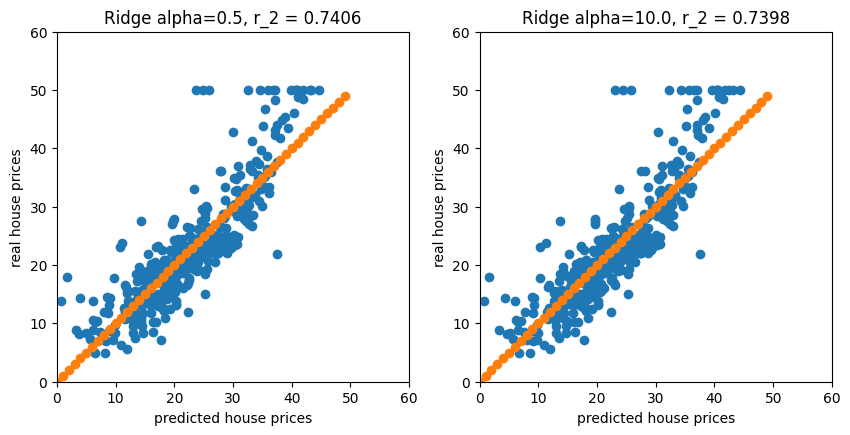

In [213]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

features = features_standardized

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)

# r_2 score
y_pred = model.predict(features)
# y_pred = (model.coef_ * features).sum(axis=1) + model.intercept_

plt.scatter(y_pred, target)
plt.xlabel('predicted house prices')
plt.ylabel('real house prices')
plt.xlim([0,60])
plt.ylim([0,60])
plt.title('Ridge alpha=0.5, r_2 = ' + str(r2_score(target, y_pred).round(4)))
t = np.array([i for i in range(0,50)])
plt.scatter(t, t)

plt.subplot(2, 2, 2)
# r_2 score
y_pred = model_cv.predict(features)
# y_pred = (model.coef_ * features).sum(axis=1) + model.intercept_

plt.scatter(y_pred, target)
plt.xlabel('predicted house prices')
plt.ylabel('real house prices')
plt.xlim([0,60])
plt.ylim([0,60])
plt.title('Ridge alpha=10.0, r_2 = ' + str(r2_score(target, y_pred).round(4)))
t = np.array([i for i in range(0,50)])
plt.scatter(t, t)

plt.show()

## 13.5 라쏘 회귀로 특성 줄이기

In [326]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 데이터를 로드합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

features = data
target = target

# 특성을 표준화합니다.
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# alpha 값을 지정한 라쏘 회귀를 만듭니다.
regression = Lasso(alpha=0.5)

# 선형 회귀 모델을 훈련합니다.
model = regression.fit(features_standardized, target)

In [327]:
# 계수를 확인합니다.
model.coef_

array([-0.11526463,  0.        , -0.        ,  0.39707879, -0.        ,
        2.97425861, -0.        , -0.17056942, -0.        , -0.        ,
       -1.59844856,  0.54313871, -3.66614361])

alpha 값이 너무 크게 증가하면 어떤 특성도 사용되지 않습니다.

In [328]:
# 큰 alpha 값을 지정한 라쏘 회귀를 만듭니다.
regression_a10 = Lasso(alpha=10)
model_a10 = regression_a10.fit(features_standardized, target)
model_a10.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

### 옮긴이 붙임

In [329]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import LassoCV

# 세 개의 alpha 값에 대한 라쏘 회귀를 만듭니다.
lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

# 선형 회귀 모델을 훈련합니다.
model_cv = lasso_cv.fit(features_standardized, target)

# alpha 값을 확인합니다.
print('alpha = ' + str(model_cv.alpha_))

# 계수를 확인합니다.
model_cv.coef_

alpha = 0.1


array([-0.63230364,  0.70840931, -0.        ,  0.65760723, -1.57419335,
        2.82626903, -0.        , -2.42207901,  1.19593681, -0.84646778,
       -1.92249345,  0.76216539, -3.72618383])

In [330]:
# 1000개의 alpha 값을 탐색하는 라쏘 회귀를 만듭니다.
lasso_cv = LassoCV(n_alphas=1000, cv=5)

# 선형 회귀 모델을 훈련합니다.
model_cv = lasso_cv.fit(features_standardized, target)

# alpha 값을 확인합니다.
print(model_cv.alpha_)

# 계수를 확인합니다.
model_cv.coef_

0.15326173083090822


array([-0.47509958,  0.51087329, -0.06951944,  0.64416411, -1.32325523,
        2.90601026, -0.        , -2.05439547,  0.42015063, -0.19614605,
       -1.85051983,  0.71550534, -3.72013448])

In [331]:
lasso_cv.alphas_

array([6.77765364, 6.73095006, 6.68456831, 6.63850616, 6.59276142,
       6.54733189, 6.50221542, 6.45740983, 6.41291299, 6.36872277,
       6.32483706, 6.28125375, 6.23797077, 6.19498605, 6.15229752,
       6.10990315, 6.06780092, 6.0259888 , 5.98446481, 5.94322695,
       5.90227325, 5.86160175, 5.82121052, 5.78109761, 5.74126112,
       5.70169913, 5.66240975, 5.62339112, 5.58464135, 5.5461586 ,
       5.50794102, 5.4699868 , 5.43229411, 5.39486116, 5.35768615,
       5.32076731, 5.28410287, 5.24769107, 5.21153018, 5.17561847,
       5.13995423, 5.10453573, 5.0693613 , 5.03442925, 4.99973792,
       4.96528563, 4.93107075, 4.89709163, 4.86334666, 4.82983422,
       4.79655271, 4.76350054, 4.73067612, 4.69807789, 4.66570428,
       4.63355376, 4.60162478, 4.56991582, 4.53842536, 4.50715189,
       4.47609393, 4.44524998, 4.41461857, 4.38419823, 4.35398751,
       4.32398498, 4.29418918, 4.2645987 , 4.23521213, 4.20602805,
       4.17704507, 4.14826181, 4.11967689, 4.09128894, 4.06309

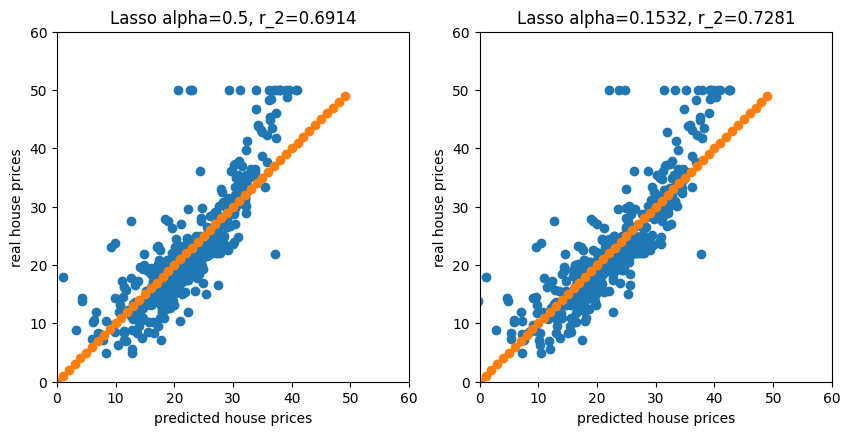

In [332]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

features = features_standardized

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)

# r_2 score
y_pred = model.predict(features)
# y_pred = (model.coef_ * features).sum(axis=1) + model.intercept_

plt.scatter(y_pred, target)
plt.xlabel('predicted house prices')
plt.ylabel('real house prices')
plt.xlim([0,60])
plt.ylim([0,60])
plt.title('Lasso alpha=0.5, r_2=' + str(r2_score(target, y_pred).round(4)))
t = np.array([i for i in range(0,50)])
plt.scatter(t, t)

plt.subplot(2, 2, 2)
# r_2 score
y_pred = model_cv.predict(features)

plt.scatter(y_pred, target)
plt.xlabel('predicted house prices')
plt.ylabel('real house prices')
plt.xlim([0,60])
plt.ylim([0,60])
plt.title('Lasso alpha=0.1532, r_2=' + str(r2_score(target, y_pred).round(4)))
t = np.array([i for i in range(0,50)])
plt.scatter(t, t)

plt.show()